# ESAME MODULO 3 - PYTHON¶

## **LIBRERIE E IMPORTAZIONI**

In [4]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image


In [6]:
filepath = "C:\\Users\\bocci\\Desktop\\ESAME FINALE\\Esame.png"
Esame = Image.open(filepath)

In [7]:
filepath = "C:\\Users\\bocci\\Desktop\\ESAME FINALE\\Note_traccia.png"
Note_traccia = Image.open(filepath)

In [8]:
filepath = "C:\\Users\\bocci\\Desktop\\ESAME FINALE\\Traccia.png"
Traccia = Image.open(filepath)

In [9]:
filepath = "C:\\Users\\bocci\\Desktop\\ESAME FINALE\\Consegna.png"
Consegna = Image.open(filepath)

In [10]:
filepath = "C:\\Users\\bocci\\Desktop\\ESAME FINALE\\Ringraziamenti.png"
Ringraziamenti = Image.open(filepath)

## **ESAME**

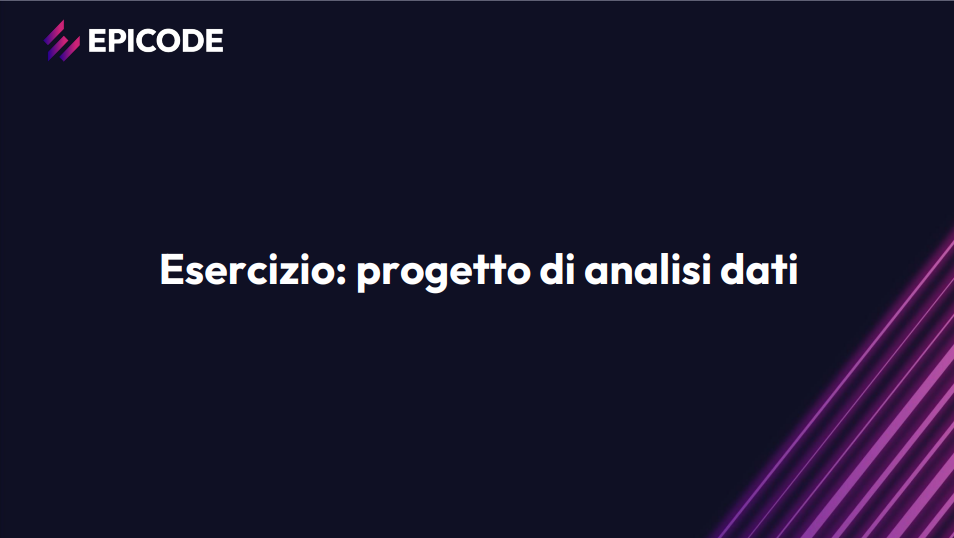

In [12]:
Esame

## **LEGENDA VARIABILI E DATAFRAME**

PER LA PULIZIA E LA VISUALIZZAZIONE DEL DATASET MI SONO SERVITO DI UNA SERIE DI VARIABILI, AL FINE DI AVERE TUTTO PIU CHIARO SU EXCEL
    UTILI PER L'ANALISI DELLE NOTE DELLA TRACCIA E PER ESPORTARE DATASET PARZIALI O TEMPORANEI IN FORMATO CSV

- df_covid # Identifica l'intero dataset
- df_continent_null # Identifica i continenti dove all'interno della colonna continent il valore è null
- df_location_puntuale # Nuovo dataframe con solo le righe che hanno un 'continent' definito (cioè dati puntuali) nella colonna continent
- aggregati_da_escludere # Lista di valori da escludere dalla colonna location
- df_paesi # Nuovo DataFrame filtrando solo i dati a livello di paese, escludendo i valori aggregati dalla colonna location
- df_aggregati # Creo un dataframe contenente esattamente le righe escluse da df_paesi
- df_covid_rimozione_null # Nuovo dataframe aggiornato con la rimozione dei valori null di continent
- percentuale_df_paesi_location # % dataframe df_paesi rispetto al dataframe originario df_covid
- percentuale_nulli_continent # % null di continent
- valori_nulli_continent # totale valori null di continent
- totale_righe # numero righe df_covid
- numero_righe_location # numero righe df_paesi
- percentuale_df_aggregati_location # % righe rimosse da location rispetto al df originario df_covid
- numero_aggregati_location # Numero righe del df_aggregati
- df_paesi_new # Nuovo dataframe di df_paesi al quale sono stati esclusi oltre che gli aggregati da escludere, anche Oceania e European Union
- df_temp # dataframe temporaneo nel quale sono presenti le esclusioni di Oceania e European Union da location
- df_covid_new # Questo è il nuovo e definitivo dataframe df_covid, con esclusione dei valori null da continent
- continents # Variabile con i nomi dei continenti
- continent_dfs # Dizionario con lista continenti = continent_dfs['Asia'] - continent_dfs['Europe'] - continent_dfs['Africa']
- continent_dfs['Oceania'] - continent_dfs['df_North_America'] - continent_dfs['df_South_America']
- df_asia # Dataframe singolo per ogni continente
- df_europe # Dataframe singolo per ogni continente
- df_africa # Dataframe singolo per ogni continente
- df_oceania # Dataframe singolo per ogni continente
- df_north_america # Dataframe singolo per ogni continente
- df_south_america # Dataframe singolo per ogni continente
- df_col_utili # Qui ho creato un dataset di df_covid_new con le sole colonne che ritengo utili allo svolgimento delle tracce
- df_nonull_newcases # Qui ho rimosso tutti i null dal df_covid_new z
- df_nonzerovalues_newcases # Qui ho rimosso tutti gli zeri dal nuovo df_nonull_newcases, sarà il mio dataframe di riferimento per lo svolgimento delle tracce


QUESTE LE VARIABILI USATE PER LO SVOLGIMENTO DELLE TRACCE

- df_nonull_newcases # Qui rimuovo i null da new_cases
- df_nonzerovalues_newcases # Qui ho rimosso tutti gli zero da df_nonull_newcases (Divenuto il dataframe di riferimento per lo svolgimento delle tracce. Definitivo)
- continent_cases # Casi per continente
- continent_percent # Percentuale per continente rispetto al totale mondiale
- df_italia_2022 # dataframe relativo ai dati italiani per l'anno 2022, utile per lo svolgimento dell'esercizio 3
- total_world_cases # somma totale di tutti i new_cases
- icu_data # Dataframe riguardante stati di Italia, Francia e Germania utile allo svolgimento dell'esercizio 4 relativo al numero di pazienti in terapia intensiva (Intensive Care Unit, ICU, considerando quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso)
- dark_purple_palette # Variabile per definire tonalità più scure di viola
- hosp_data_2021 # Dataframe relativo agli ospedalizzati di Italia, Francia, Germania e Spagna, utile per lo svolgimento dell'esercizio 5
- hosp_sum # Somma dei totali ospedalizzati per nazione 2021 (corretta secondo il mio ragionamento)
- hosp_sum2 # Somma dei totali ospedalizzati per nazione 2021 (non corretta secondo il mio ragionamento)
- df_covidtemp_nonzero # Qui ho ordinato per location e date in ordine cronologico
- covidtempfirstcasesforlocation # # Qui trovo il primo valore per ogni location (ordinato in ordine cronologico grazie alla variabile df_covidtemp_nonzero) 


## **NOTE**


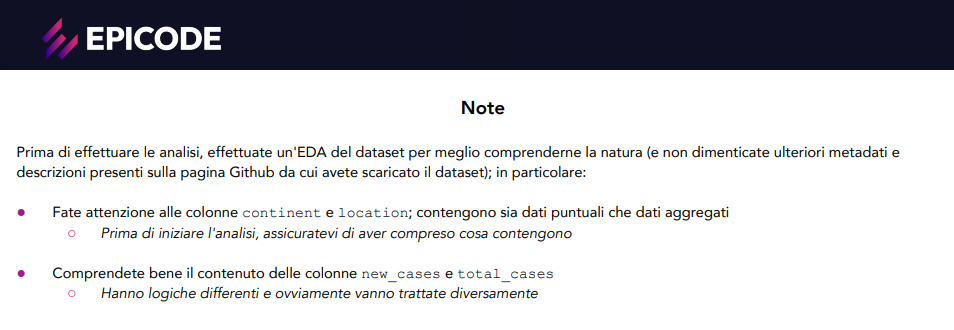

In [16]:
Note_traccia

In [17]:
df_covid = pd.read_csv("owid-covid-data.csv")

In [18]:
df_covid # Verifico le dimensioni del dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [19]:
# Visualizzo le prime righe del dataset
df_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [20]:
# Controllo le informazioni sulle colonne
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [21]:
# Conto i valori nulli per colonna
df_covid.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [22]:
# Ottengo statistiche descrittive sulle colonne numeriche
df_covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,835.514313,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,1134.932671,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,24.568000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,295.089000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,1283.817000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000


In [23]:
# Controllo i valori unici nella colonna 'continent'
df_covid['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [24]:
# Controllo i valori unici nella colonna 'location'
df_covid['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guine

### VERIFICO LA PRIMA NOTA

In [26]:
df_covid.sample(50)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
108293,SLV,North America,El Salvador,2023-02-13,201785.0,0.0,0.000,4230.0,0.0,0.000,...,18.8,90.650,1.300,73.32,0.673,6336393,NaN,NaN,NaN,NaN
66387,CPV,Africa,Cape Verde,2022-12-27,63190.0,0.0,3.714,412.0,0.0,0.000,...,16.5,NaN,2.100,72.98,0.665,593162,NaN,NaN,NaN,NaN
268715,NCL,Oceania,New Caledonia,2024-05-04,80163.0,0.0,14.143,314.0,0.0,0.000,...,NaN,NaN,NaN,77.55,NaN,289959,NaN,NaN,NaN,NaN
161036,GUY,South America,Guyana,2021-06-25,18837.0,0.0,107.000,442.0,0.0,3.286,...,NaN,77.159,1.600,69.91,0.682,808727,NaN,NaN,NaN,NaN
377021,TJK,Asia,Tajikistan,2023-10-05,17786.0,0.0,0.000,125.0,0.0,0.000,...,NaN,72.704,4.800,71.10,0.668,9952789,NaN,NaN,NaN,NaN
348281,SXM,North America,Sint Maarten (Dutch part),2022-02-04,9229.0,0.0,37.714,79.0,0.0,0.286,...,NaN,NaN,NaN,78.95,NaN,44192,NaN,NaN,NaN,NaN
384076,TKL,Oceania,Tokelau,2021-12-18,0.0,0.0,0.000,0.0,0.0,0.000,...,NaN,NaN,NaN,81.86,NaN,1893,NaN,NaN,NaN,NaN
367653,SUR,South America,Suriname,2020-02-19,0.0,0.0,0.000,0.0,0.0,0.000,...,42.9,67.779,3.100,71.68,0.738,618046,NaN,NaN,NaN,NaN
47559,BIH,Europe,Bosnia and Herzegovina,2021-11-08,259233.0,0.0,782.286,11767.0,0.0,34.143,...,47.7,97.164,3.500,77.40,0.780,3233530,NaN,NaN,NaN,NaN
2857,OWID_AFR,NaN,Africa,2023-04-02,13073305.0,1783.0,254.714,258835.0,14.0,2.000,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN


In [27]:
# Contare il numero di valori nulli in 'continent'
df_covid['continent'].isnull().sum()

26525

In [28]:
# Creo un nuovo DataFrame con le righe dove 'continent' è NaN
df_continent_null = df_covid[df_covid['continent'].isnull()]

# Visualizzare i primi risultati
df_continent_null

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1674,OWID_AFR,NaN,Africa,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1675,OWID_AFR,NaN,Africa,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1676,OWID_AFR,NaN,Africa,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1677,OWID_AFR,NaN,Africa,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1678,OWID_AFR,NaN,Africa,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424408,OWID_WRL,NaN,World,2024-08-10,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN
424409,OWID_WRL,NaN,World,2024-08-11,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN
424410,OWID_WRL,NaN,World,2024-08-12,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN
424411,OWID_WRL,NaN,World,2024-08-13,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN


In [29]:
# Visualizzo i valori unici per identificare aggregati
print("Valori unici in 'location':", df_covid['location'].unique())


Valori unici in 'location': ['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'England' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Europe' 'European Union (27)' 'Faroe Islands' 'Falkland Islands' 'Fiji'
 'Finland' 

In [30]:
# Creo un nuovo DataFrame con solo le righe che hanno un 'continent' definito (cioè dati puntuali)
df_location_puntuale = df_covid[df_covid['continent'].notnull()]

# Visualizzare i primi risultati
df_location_puntuale


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [31]:
# Definisco una lista di valori da escludere (aggregati) dalla colonna location
aggregati_da_escludere = ['World', 'Europe', 'Asia', 'Africa', 'North America', 'South America', 'European Union']

In [32]:
aggregati_da_escludere

['World',
 'Europe',
 'Asia',
 'Africa',
 'North America',
 'South America',
 'European Union']

In [33]:
# Creo un nuovo DataFrame (df_paesi) filtrando solo i dati a livello di paese, escludendo i valori aggregati dalla colonna location.
df_paesi = df_covid[~df_covid['location'].isin(aggregati_da_escludere)].copy()

In [34]:
# Verifico df_paesi
print("\nNumero di righe dopo il filtro:", len(df_paesi))
df_paesi


Numero di righe dopo il filtro: 419361


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [35]:
df_aggregati = df_covid[df_covid['location'].isin(aggregati_da_escludere)]
df_aggregati # Creo un dataframe contenente esattamente le righe escluse da df_paesi

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1674,OWID_AFR,NaN,Africa,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1675,OWID_AFR,NaN,Africa,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1676,OWID_AFR,NaN,Africa,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1677,OWID_AFR,NaN,Africa,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1678,OWID_AFR,NaN,Africa,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424408,OWID_WRL,NaN,World,2024-08-10,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN
424409,OWID_WRL,NaN,World,2024-08-11,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN
424410,OWID_WRL,NaN,World,2024-08-12,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN
424411,OWID_WRL,NaN,World,2024-08-13,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN


In [36]:
df_covid['continent'].unique() # Controllo se i valori nan in continent sono presenti in aggregati_da_escludere

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [37]:
df_continent_null['location'].unique() # Controllo se i valori nan in continent sono presenti in aggregati_da_escludere

array(['Africa', 'Asia', 'Europe', 'European Union (27)',
       'High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'North America', 'Oceania',
       'South America', 'Upper-middle-income countries', 'World'],
      dtype=object)

In [38]:
aggregati_da_escludere

['World',
 'Europe',
 'Asia',
 'Africa',
 'North America',
 'South America',
 'European Union']

In [39]:
df_covid_rimozione_null = df_covid.dropna(subset=['continent'])
df_covid_rimozione_null # Elimino le righe con continent null creando una nuova variabile (nuovo df)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [40]:
df_continent_null

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1674,OWID_AFR,NaN,Africa,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1675,OWID_AFR,NaN,Africa,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1676,OWID_AFR,NaN,Africa,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1677,OWID_AFR,NaN,Africa,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1678,OWID_AFR,NaN,Africa,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424408,OWID_WRL,NaN,World,2024-08-10,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN
424409,OWID_WRL,NaN,World,2024-08-11,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN
424410,OWID_WRL,NaN,World,2024-08-12,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN
424411,OWID_WRL,NaN,World,2024-08-13,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN


In [41]:
#esporto in csv il dataframe con i valori null della colonna continent
df_continent_null.to_csv("valori_null_continent.csv", index=False)

In [42]:
df_paesi.to_csv("valori_aggregati_location.csv", index=False)

In [43]:
#esporto in csv il dataframe con i valori al netto dei null della colonna continent (null rimossi)
df_covid_rimozione_null.to_csv("valori_continent_rimozione_null.csv", index=False)

In [44]:
#esporto in csv il dataframe con i valori rimossi dalla colonna location (aggregati rimossi)
df_aggregati.to_csv("valori_aggregati_location_rimossi.csv", index=False)

In [45]:
# Esporto in csv il df_paesi
df_paesi.to_csv("df_paesi.csv" , index=False)

In [46]:
print("\nNumero di righe dopo il filtro:", len(df_paesi)) # MI sono reso conto che è ancora presente European Union

# Per cercare una location nel dataframe filtrato (se pensi sia presente)
if 'European Union' in df_paesi['location'].values:
    print(df_paesi.loc[df_paesi['location'] == 'European Union'])
else:
    print("'European Union' non trovata - è stata esclusa dal filtro")


Numero di righe dopo il filtro: 419361
'European Union' non trovata - è stata esclusa dal filtro


In [47]:
# Crea un DataFrame temporaneo con solo le righe da escludere
df_temp = df_paesi[df_paesi['location'].str.contains('Oceania|Europ', na=False, case=False)]

# Visualizzo questo DataFrame temporaneo
print("Righe che verranno escluse:")
print(df_temp)

# Ora lo escludo dal DataFrame principale
df_paesi_new = df_paesi[~df_paesi['location'].str.contains('Oceania|European Union', na=False, regex=True)]

# 4. Verifico
print("\nDataFrame dopo l'esclusione:")
print(f"Righe totali rimaste: {len(df_paesi_new)}")


Righe che verranno escluse:
        iso_code continent             location        date  total_cases  \
120253  OWID_EUN       NaN  European Union (27)  2020-12-04          NaN   
120254  OWID_EUN       NaN  European Union (27)  2020-12-05          NaN   
120255  OWID_EUN       NaN  European Union (27)  2020-12-06          NaN   
120256  OWID_EUN       NaN  European Union (27)  2020-12-07          NaN   
120257  OWID_EUN       NaN  European Union (27)  2020-12-08          NaN   
...          ...       ...                  ...         ...          ...   
289294  OWID_OCE       NaN              Oceania  2024-08-07          NaN   
289295  OWID_OCE       NaN              Oceania  2024-08-08          NaN   
289296  OWID_OCE       NaN              Oceania  2024-08-09          NaN   
289297  OWID_OCE       NaN              Oceania  2024-08-10          NaN   
289298  OWID_OCE       NaN              Oceania  2024-08-11          NaN   

        new_cases  new_cases_smoothed  total_deaths  new_de

In [48]:
# Esporto in csv il df_paesi
df_paesi_new.to_csv("df_paesi_new.csv" , index=False)

In [49]:
df_temp

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
120253,OWID_EUN,NaN,European Union (27),2020-12-04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN
120254,OWID_EUN,NaN,European Union (27),2020-12-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN
120255,OWID_EUN,NaN,European Union (27),2020-12-06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN
120256,OWID_EUN,NaN,European Union (27),2020-12-07,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN
120257,OWID_EUN,NaN,European Union (27),2020-12-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289294,OWID_OCE,NaN,Oceania,2024-08-07,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45038860,NaN,NaN,NaN,NaN
289295,OWID_OCE,NaN,Oceania,2024-08-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45038860,NaN,NaN,NaN,NaN
289296,OWID_OCE,NaN,Oceania,2024-08-09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45038860,NaN,NaN,NaN,NaN
289297,OWID_OCE,NaN,Oceania,2024-08-10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45038860,NaN,NaN,NaN,NaN


In [50]:
print("\nNumero di righe dopo il filtro:", len(df_paesi))

# Per cercare una location nel dataframe filtrato
if 'Oceania' in df_paesi['location'].values:
    print(df_paesi.loc[df_paesi['location'] == 'Oceania'])
else:
    print("'Oceania' non trovata - è stata esclusa dal filtro")


Numero di righe dopo il filtro: 419361
        iso_code continent location        date  total_cases  new_cases  \
287618  OWID_OCE       NaN  Oceania  2020-01-05          0.0        0.0   
287619  OWID_OCE       NaN  Oceania  2020-01-06          0.0        0.0   
287620  OWID_OCE       NaN  Oceania  2020-01-07          0.0        0.0   
287621  OWID_OCE       NaN  Oceania  2020-01-08          0.0        0.0   
287622  OWID_OCE       NaN  Oceania  2020-01-09          0.0        0.0   
...          ...       ...      ...         ...          ...        ...   
289294  OWID_OCE       NaN  Oceania  2024-08-07          NaN        NaN   
289295  OWID_OCE       NaN  Oceania  2024-08-08          NaN        NaN   
289296  OWID_OCE       NaN  Oceania  2024-08-09          NaN        NaN   
289297  OWID_OCE       NaN  Oceania  2024-08-10          NaN        NaN   
289298  OWID_OCE       NaN  Oceania  2024-08-11          NaN        NaN   

        new_cases_smoothed  total_deaths  new_deaths  new_d

In [51]:
# Così ho ripristinato i null rimossi dal df_covid con la riga 194 prima di creare la variabile df_covid_rimozione_null
# df_covid = pd.concat([df_covid, df_continent_null], ignore_index=True)


In [52]:
df_paesi

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [53]:
df_covid_rimozione_null

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [54]:
df_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [55]:
totale_righe = len(df_covid)
totale_righe # totale righe del df_covid (df originario)

429435

In [56]:
valori_nulli_continent = df_covid['continent'].isnull().sum()
valori_nulli_continent # Totale dei valori null di continent

26525

In [57]:
percentuale_nulli_continent = (valori_nulli_continent / totale_righe) * 100
percentuale_nulli_continent 


6.176720574708629

In [58]:
numero_righe_location = len(df_paesi)
numero_righe_location # Numero righe del df_paesi al netto delle righe rimosse (numero_aggregati_location)

419361

In [59]:
numero_righe_location_new = len(df_paesi_new)
numero_righe_location_new # Numero righe del df_paesi_new (dopo la rimozione di Oceania e European Union da location) 
# al netto delle righe rimosse (numero_aggregati_location + Oceania e European Union)


414656

In [60]:
percentuale_df_paesi_location = (numero_righe_location / totale_righe) * 100
percentuale_df_paesi_location 

97.65412693422753

In [61]:
percentuale_df_paesi_location = (numero_righe_location_new / totale_righe) * 100
percentuale_df_paesi_location 

96.55850128657421

In [62]:
numero_aggregati_location = len(df_aggregati)
numero_aggregati_location # Numero di righe del df_aggregati (location) rimosse dal df_covid (df originario)

10074

In [63]:
percentuale_df_aggregati_location = (numero_aggregati_location / totale_righe) * 100
percentuale_df_aggregati_location 

2.3458730657724685

In [64]:
# 1. Calcola il numero di righe ORIGINALI (prima di qualsiasi filtro)
totale_righe_originali = len(df_paesi)  # Assicurati di aver salvato il df prima del filtro

# 2. Calcola le righe da rimuovere (Oceania/Europe)
righe_da_rimuovere = len(df_temp)

# 3. Calcola la PERCENTUALE delle righe rimosse
percentuale_rimosse = (righe_da_rimuovere / totale_righe_originali) * 100

print(f"Righe totali originali: {totale_righe_originali}")
print(f"Righe rimosse: {righe_da_rimuovere}")
print(f"Percentuale rimossa: {percentuale_rimosse:.2f}%")

Righe totali originali: 419361
Righe rimosse: 4705
Percentuale rimossa: 1.12%


In [65]:
df_covid_new = df_covid_rimozione_null
df_covid_new

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [66]:
df_covid_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402910 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    402910 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    402910 non-null  object 
 3   date                                        402910 non-null  object 
 4   total_cases                                 391716 non-null  float64
 5   new_cases                                   390071 non-null  float64
 6   new_cases_smoothed                          388901 non-null  float64
 7   total_deaths                                391716 non-null  float64
 8   new_deaths                                  390520 non-null  float64
 9   new_deaths_smoothed                         389350 non-null  float64
 10  t

In [67]:
# Verifico la presenza di null in seguito alla pulizia (della colonna continent) e alla creazione del dataframe finale df_covid_new
df_covid_new.isnull().sum()

iso_code                                        0
continent                                       0
location                                        0
date                                            0
total_cases                                 11194
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       389499
excess_mortality_cumulative                389499
excess_mortality                           389499
excess_mortality_cumulative_per_million    389499
Length: 67, dtype: int64

In [68]:
# Ora genero un dizionario per memorizzare i dataframe continent separati
continents = ['Asia', 'Europe', 'Africa', 'Oceania', 'North America', 'South America'] # Qui creo una variabile continenti
continent_dfs = {} #Qui creo il dizionario
for continent in continents:
    continent_dfs[continent] = df_covid_new[df_covid_new['continent'] == continent].copy()  # Qui filtro il DataFrame per il continente corrente
# Ora posso accedere a ciascun DataFrame con:
# continent_dfs['Asia'] - continent_dfs['Europe'] - continent_dfs['Africa'] - continent_dfs['Oceania'] - continent_dfs['df_North_America'] - continent_dfs['df_South_America']

In [69]:
df_covid_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402910 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    402910 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    402910 non-null  object 
 3   date                                        402910 non-null  object 
 4   total_cases                                 391716 non-null  float64
 5   new_cases                                   390071 non-null  float64
 6   new_cases_smoothed                          388901 non-null  float64
 7   total_deaths                                391716 non-null  float64
 8   new_deaths                                  390520 non-null  float64
 9   new_deaths_smoothed                         389350 non-null  float64
 10  t

In [70]:
# Ora genero un dataframe per ogni continente, creando variabili separate per ciascun continente
df_asia = df_covid_new[df_covid_new['continent'] == 'Asia'].copy()
df_europe = df_covid_new[df_covid_new['continent'] == 'Europe'].copy()
df_africa = df_covid_new[df_covid_new['continent'] == 'Africa'].copy()
df_oceania = df_covid_new[df_covid_new['continent'] == 'Oceania'].copy()
df_north_america = df_covid_new[df_covid_new['continent'] == 'North America'].copy()
df_south_america = df_covid_new[df_covid_new['continent'] == 'South America'].copy()


In [71]:
df_south_america

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
15066,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,27.7,NaN,5.0,76.67,0.845,45510324,NaN,NaN,NaN,NaN
15067,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,27.7,NaN,5.0,76.67,0.845,45510324,NaN,NaN,NaN,NaN
15068,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,27.7,NaN,5.0,76.67,0.845,45510324,NaN,NaN,NaN,NaN
15069,ARG,South America,Argentina,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,27.7,NaN,5.0,76.67,0.845,45510324,NaN,NaN,NaN,NaN
15070,ARG,South America,Argentina,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,27.7,NaN,5.0,76.67,0.845,45510324,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418177,VEN,South America,Venezuela,2024-07-31,552695.0,0.0,0.0,5856.0,0.0,0.0,...,NaN,NaN,0.8,72.06,0.711,28301700,NaN,NaN,NaN,NaN
418178,VEN,South America,Venezuela,2024-08-01,552695.0,0.0,0.0,5856.0,0.0,0.0,...,NaN,NaN,0.8,72.06,0.711,28301700,NaN,NaN,NaN,NaN
418179,VEN,South America,Venezuela,2024-08-02,552695.0,0.0,0.0,5856.0,0.0,0.0,...,NaN,NaN,0.8,72.06,0.711,28301700,NaN,NaN,NaN,NaN
418180,VEN,South America,Venezuela,2024-08-03,552695.0,0.0,0.0,5856.0,0.0,0.0,...,NaN,NaN,0.8,72.06,0.711,28301700,NaN,NaN,NaN,NaN


In [72]:
df_north_america

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
11718,AIA,North America,Anguilla,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,81.88,NaN,15877,NaN,NaN,NaN,NaN
11719,AIA,North America,Anguilla,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,81.88,NaN,15877,NaN,NaN,NaN,NaN
11720,AIA,North America,Anguilla,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,81.88,NaN,15877,NaN,NaN,NaN,NaN
11721,AIA,North America,Anguilla,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,81.88,NaN,15877,NaN,NaN,NaN,NaN
11722,AIA,North America,Anguilla,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,81.88,NaN,15877,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406794,VIR,North America,United States Virgin Islands,2024-07-31,25389.0,0.0,0.0,132.0,0.0,0.0,...,NaN,NaN,NaN,80.58,NaN,99479,NaN,NaN,NaN,NaN
406795,VIR,North America,United States Virgin Islands,2024-08-01,25389.0,0.0,0.0,132.0,0.0,0.0,...,NaN,NaN,NaN,80.58,NaN,99479,NaN,NaN,NaN,NaN
406796,VIR,North America,United States Virgin Islands,2024-08-02,25389.0,0.0,0.0,132.0,0.0,0.0,...,NaN,NaN,NaN,80.58,NaN,99479,NaN,NaN,NaN,NaN
406797,VIR,North America,United States Virgin Islands,2024-08-03,25389.0,0.0,0.0,132.0,0.0,0.0,...,NaN,NaN,NaN,80.58,NaN,99479,NaN,NaN,NaN,NaN


In [73]:
df_oceania

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
6696,ASM,Oceania,American Samoa,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295,NaN,NaN,NaN,NaN
6697,ASM,Oceania,American Samoa,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295,NaN,NaN,NaN,NaN
6698,ASM,Oceania,American Samoa,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295,NaN,NaN,NaN,NaN
6699,ASM,Oceania,American Samoa,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295,NaN,NaN,NaN,NaN
6700,ASM,Oceania,American Samoa,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422723,WLF,Oceania,Wallis and Futuna,2024-07-31,3760.0,0.0,0.0,9.0,0.0,0.0,...,NaN,NaN,NaN,79.94,NaN,11596,NaN,NaN,NaN,NaN
422724,WLF,Oceania,Wallis and Futuna,2024-08-01,3760.0,0.0,0.0,9.0,0.0,0.0,...,NaN,NaN,NaN,79.94,NaN,11596,NaN,NaN,NaN,NaN
422725,WLF,Oceania,Wallis and Futuna,2024-08-02,3760.0,0.0,0.0,9.0,0.0,0.0,...,NaN,NaN,NaN,79.94,NaN,11596,NaN,NaN,NaN,NaN
422726,WLF,Oceania,Wallis and Futuna,2024-08-03,3760.0,0.0,0.0,9.0,0.0,0.0,...,NaN,NaN,NaN,79.94,NaN,11596,NaN,NaN,NaN,NaN


In [74]:
df_africa

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
5022,DZA,Africa,Algeria,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,30.4,83.741,1.9,76.88,0.748,44903228,NaN,NaN,NaN,NaN
5023,DZA,Africa,Algeria,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,30.4,83.741,1.9,76.88,0.748,44903228,NaN,NaN,NaN,NaN
5024,DZA,Africa,Algeria,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,30.4,83.741,1.9,76.88,0.748,44903228,NaN,NaN,NaN,NaN
5025,DZA,Africa,Algeria,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,30.4,83.741,1.9,76.88,0.748,44903228,NaN,NaN,NaN,NaN
5026,DZA,Africa,Algeria,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,30.4,83.741,1.9,76.88,0.748,44903228,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [75]:
df_europe

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
3348,ALB,Europe,Albania,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
3349,ALB,Europe,Albania,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
3350,ALB,Europe,Albania,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
3351,ALB,Europe,Albania,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
3352,ALB,Europe,Albania,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421049,OWID_WLS,Europe,Wales,2023-07-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3170000,NaN,NaN,NaN,NaN
421050,OWID_WLS,Europe,Wales,2023-07-09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3170000,NaN,NaN,NaN,NaN
421051,OWID_WLS,Europe,Wales,2023-07-10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3170000,NaN,NaN,NaN,NaN
421052,OWID_WLS,Europe,Wales,2023-07-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3170000,NaN,NaN,NaN,NaN


In [76]:
df_asia

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426082,YEM,Asia,Yemen,2024-07-31,11945.0,0.0,0.0,2159.0,0.0,0.0,...,29.2,49.542,0.7,66.12,0.470,33696612,NaN,NaN,NaN,NaN
426083,YEM,Asia,Yemen,2024-08-01,11945.0,0.0,0.0,2159.0,0.0,0.0,...,29.2,49.542,0.7,66.12,0.470,33696612,NaN,NaN,NaN,NaN
426084,YEM,Asia,Yemen,2024-08-02,11945.0,0.0,0.0,2159.0,0.0,0.0,...,29.2,49.542,0.7,66.12,0.470,33696612,NaN,NaN,NaN,NaN
426085,YEM,Asia,Yemen,2024-08-03,11945.0,0.0,0.0,2159.0,0.0,0.0,...,29.2,49.542,0.7,66.12,0.470,33696612,NaN,NaN,NaN,NaN


In [77]:
# Lista dei  dataframe continentali
continental_dfs = {
    'Asia': df_asia,
    'Europa': df_europe,
    'Africa': df_africa,
    'Oceania': df_oceania,
    'Nord America': df_north_america,
    'Sud America': df_south_america
}

# Genero una stampa ordinata delle dimensioni
print("\nDIMENSIONI DATAFRAME CONTINENTALI")
print("-" * 40)
for name, df in continental_dfs.items():
    print(f"{name:<15}: {len(df):>6} righe | {len(df.columns):>2} colonne")
print("-" * 40)
total_rows = sum(len(df) for df in continental_dfs.values())
print(f"TOTALE{' ':>8}: {total_rows:>6} righe")


DIMENSIONI DATAFRAME CONTINENTALI
----------------------------------------
Asia           :  84199 righe | 67 colonne
Europa         :  91031 righe | 67 colonne
Africa         :  95419 righe | 67 colonne
Oceania        :  40183 righe | 67 colonne
Nord America   :  68638 righe | 67 colonne
Sud America    :  23440 righe | 67 colonne
----------------------------------------
TOTALE        : 402910 righe


VALUTAZIONI: DOPO AVER GENERATO UNA SERIE DI VARIABILI TALI DA PERMETTERMI DI INDIVIDUARE I VALORI NULLI NELLA COLONNA CONTINENT E I VALORI AGGREGATI NELLA COLONNA LOCATION, HO VALUTATO DI VOLER RIMUOVERE DAL DATASET I VALORI NULL DALLA COLONNA CONTINENT (QUINDI NON LA RIMOZIONE DEI VALORI AGGREGATI DALLA COLONNA LOCATION), IN QUANTO, IL RESULT SET FINALE CON IL NUOVO DATAFRAME df_paesi e successivamente df_paesi_new ANDAVA A RIMUOVERE SINGOLARMENTE E PASSO PASSO TUTTI I VALORI RIDONDANTI NELLA COLONNA LOCATION MA CONTINUAVANO A PERSISTERE ALCUNI VALORI NULL NELLA COLONNA CONTINENT; PERTANTO HO OPTATO PER LA DECISIONE PIU' DRASTICA MA ANCHE PIU' COMPLETA E DEFINITIVA' (MANO A MANO CHE PROSEGUIVO CON LA SCREMATURA, GENERAVO FILE CSV CON I QUALI HO APPROFONDITO L'ANALISI VISIVA TRAMITE EXCEL, IN MODO PIU' APPROFONDITO); IN CONCLUSIONE HO RIMOSSO I VALORI NULL DA CONTINENT (OVVIAMENTE NON HO RIMOSSO NULLA IN MODO DEFINITIVO FACENDO UN IMPLACE, MA HO GENERATO UN DATA FRAME PIU PULITO CON IL QUALE AFFRONTARE LE TRACCE DELL'ESERCIZIO).

### VERIFICO LA SECONDA NOTA

In [80]:
casi_per_continente = df_covid.groupby('continent')['new_cases'].sum().sum()
print(f'I casi per continente sono:{casi_per_continente}') # Con questo groupby vado a calcolare il numero di new_cases sul dataset originale df_covid

I casi per continente sono:775935057.0


In [81]:
casi_per_continente = df_covid.groupby('location')['new_cases'].sum().sum()
print(f'I casi per continente sono:{casi_per_continente}')

I casi per continente sono:3288392333.0


In [82]:
casi_per_continente = df_covid_new.groupby('continent')['new_cases'].sum().sum()
print(f'I casi per continente sono:{casi_per_continente}')

I casi per continente sono:775935057.0


In [83]:
casi_per_continente = df_covid_new.groupby('location')['new_cases'].sum().sum()
print(f'I casi per continente sono:{casi_per_continente}')

I casi per continente sono:775935057.0


In [84]:
df_covid_new["date"] = pd.to_datetime(df_covid_new["date"])

C:\Users\bocci\AppData\Local\Temp\ipykernel_29880\1539548751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_new["date"] = pd.to_datetime(df_covid_new["date"])


In [85]:
df_covid_new ["date"].dtype

dtype('<M8[ns]')

In [86]:
filtro_italia_2022 = (df_covid_new["location"] == "Italy") & (df_covid_new["date"].dt.year == 2022)
df_covid_new.loc[filtro_italia_2022]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186002,ITA,Europe,Italy,2022-01-01,5622431.0,0.0,36797.000,136530.0,0.0,140.857,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168226.3,12.99,8.06,2849.4834
186004,ITA,Europe,Italy,2022-01-03,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186005,ITA,Europe,Italy,2022-01-04,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186006,ITA,Europe,Italy,2022-01-05,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186362,ITA,Europe,Italy,2022-12-27,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186363,ITA,Europe,Italy,2022-12-28,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186364,ITA,Europe,Italy,2022-12-29,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186365,ITA,Europe,Italy,2022-12-30,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN


In [87]:
filtro_italia_2022 = (df_covid_new["location"] == "Italy") & (df_covid_new["date"].dt.year == 2022)
maxmin= df_covid_new.loc[filtro_italia_2022].head(80)
pd.set_option('display.max_rows', 100) # Numero massimo di righe da visualizzare
pd.set_option('display.max_columns', 50) # Numero massimo di colonne da visualizzare
maxmin

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186002,ITA,Europe,Italy,2022-01-01,5622431.0,0.0,36797.000,136530.0,0.0,140.857,94305.86,0.000,617.201,2290.038,0.000,2.363,1.84,1297.0,21.969,12562.0,212.780,818.0,13.856,8585.0,145.416,...,75.74,33.49,7286.0,38809.0,0.066,53.50,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,105117.90,10812.037,1544.577,2306.526,16.488,2.355,1.75,1319.0,22.342,13075.0,221.470,837.0,14.177,8837.0,149.685,...,75.77,33.96,7663.0,42648.0,0.072,53.50,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472,168226.30,12.99,8.06,2849.4834
186004,ITA,Europe,Italy,2022-01-03,6267035.0,0.0,92086.286,137513.0,0.0,140.429,105117.90,0.000,1544.577,2306.526,0.000,2.355,1.70,1351.0,22.884,13684.0,231.785,840.0,14.228,9246.0,156.612,...,75.84,34.84,7736.0,44899.0,0.076,53.48,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186005,ITA,Europe,Italy,2022-01-04,6267035.0,0.0,92086.286,137513.0,0.0,140.429,105117.90,0.000,1544.577,2306.526,0.000,2.355,1.67,1392.0,23.578,14304.0,242.287,874.0,14.804,9801.0,166.013,...,75.91,35.81,7825.0,47327.0,0.080,53.46,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186006,ITA,Europe,Italy,2022-01-05,6267035.0,0.0,92086.286,137513.0,0.0,140.429,105117.90,0.000,1544.577,2306.526,0.000,2.355,1.63,1428.0,24.188,14792.0,250.553,880.0,14.906,10224.0,173.178,...,75.96,36.76,7887.0,48938.0,0.083,53.44,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186007,ITA,Europe,Italy,2022-01-06,6267035.0,0.0,92086.286,137513.0,0.0,140.429,105117.90,0.000,1544.577,2306.526,0.000,2.355,1.56,1467.0,24.849,15294.0,259.056,923.0,15.634,10554.0,178.768,...,76.00,37.23,7301.0,47602.0,0.081,53.44,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186008,ITA,Europe,Italy,2022-01-07,6267035.0,0.0,92086.286,137513.0,0.0,140.429,105117.90,0.000,1544.577,2306.526,0.000,2.355,1.48,1499.0,25.391,16090.0,272.539,924.0,15.651,10915.0,184.883,...,76.09,38.16,8285.0,55459.0,0.094,53.41,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186009,ITA,Europe,Italy,2022-01-08,6267035.0,0.0,92086.286,137513.0,0.0,140.429,105117.90,0.000,1544.577,2306.526,0.000,2.355,1.46,1557.0,26.373,16487.0,279.263,943.0,15.973,11274.0,190.963,...,76.18,39.02,9660.0,66708.0,0.113,53.39,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186010,ITA,Europe,Italy,2022-01-09,7281297.0,1014262.0,144894.571,138881.0,1368.0,195.429,122130.26,17012.365,2430.338,2329.472,22.946,3.278,1.43,1595.0,27.017,17242.0,292.052,981

VALUTAZIONI: AVENDO ANALIZZATO LE DUE COLONNE TOTAL_CASES E NEW_CASES, OPTO PER UTILIZZARE LA COLONNA NEW_CASES PER I MIEI CALCOLI

In [89]:
df_covid_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402910 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    402910 non-null  object        
 1   continent                                   402910 non-null  object        
 2   location                                    402910 non-null  object        
 3   date                                        402910 non-null  datetime64[ns]
 4   total_cases                                 391716 non-null  float64       
 5   new_cases                                   390071 non-null  float64       
 6   new_cases_smoothed                          388901 non-null  float64       
 7   total_deaths                                391716 non-null  float64       
 8   new_deaths                                  390520 non-null  float64       
 9 

## **TRACCIA**


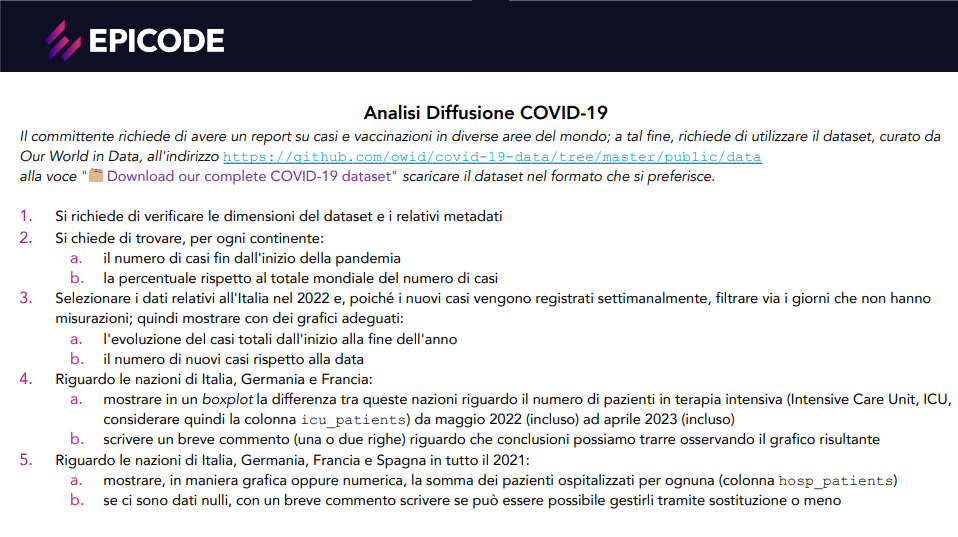

In [91]:
Traccia

In [92]:
# Inizio con la verifica delle dimensioni del dataset 
df_covid_new

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,0.0,0.0,357.208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,0.0,0.0,357.208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,0.0,0.0,357.208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,0.0,0.0,357.208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [93]:
# veifico i metadati
df_covid_new.describe()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,402910,3.917160e+05,3.900710e+05,3.889010e+05,3.917160e+05,390520.000000,389350.000000,391716.000000,390071.000000,388901.000000,391716.000000,390520.000000,389350.000000,183741.000000,39116.000000,39116.000000,40656.000000,40656.000000,10993.000000,10993.000000,24497.000000,24497.000000,7.938700e+04,7.540300e+04,79387.000000,...,62980.000000,39539.000000,179805.000000,1.769530e+05,176953.000000,196190.000000,358808.000000,332979.000000,321586.000000,329631.000000,326608.000000,210312.000000,327181.000000,344227.000000,245481.000000,242133.000000,160057.000000,289005.000000,388615.000000,317443.000000,4.029100e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,2022-04-18 09:33:33.108634368,1.827082e+06,1.989215e+03,1.995095e+03,2.044839e+04,18.080989,18.133540,112935.033392,123.293989,123.653496,827.924212,0.756545,0.758763,0.910566,660.971418,15.656340,3911.741563,125.988007,317.894114,9.671944,4291.723313,82.619130,2.110457e+07,6.728541e+04,924.254762,...,48.370532,38.818874,1893.581997,2.854543e+04,0.077057,42.877560,395.650182,30.454052,8.684041,5.487517,18921.893818,13.956155,264.801875,8.556280,10.802227,33.087032,50.549515,3.109254,73.706961,0.722060,3.338239e+07,5.604765e+04,9.766431,10.925353,1772.666400
min,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,2021-02-28 00:00:00,5.516000e+03,0.000000e+00,0.000000e+00,3.700000e+01,0.000000,0.000000,1746.769000,0.000000,0.000000,21.732000,0.000000,0.000000,0.720000,21.000000,2.328000,186.000000,30.997000,17.000000,1.549000,223.000000,23.728000,3.646540e+05,2.244000e+03,43.585500,...,20.497500,7.455000,112.000000,3.600000e+01,0.001000,22.220000,37.728000,22.200000,3.526000,2.063000,3823.194000,0.600000,175.695000,5.350000,1.900000,22.600000,19.351000,1.300000,69.500000,0.602000,3.957620e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,2022-04-17 00:00:00,5.093700e+04,0.000000e+00,8.714000e+00,6.580000e+02,0.000000,0.000000,28990.236000,0.000000,2.409000,268.003000,0.000000,0.000000,0.950000,90.000000,6.434000,776.000000,74.236000,92.000000,4.645000,864.000000,56.277000,2.067330e+06,8.783000e+03,234.141000,...,55.730000,37.710000,620.000000,6.220000e+02,0.014000,42.850000,90.672000,29.600000,6.293000,3.857000,12236.706000,2.500000,245.465000,7.200000,6.300000,33.100000,49.542000,2.500000,75.050000,0.740000,5.466000e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,2023-06-07 00:00:00,5.610120e+05,0.000000e+00,2.040000e+02,7.378000e+

In [94]:
# verifico le colonne del dataset
df_covid_new.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [95]:
print(len(df_covid_new.columns))

67


In [96]:
df_col_utili= df_covid_new[["date", "continent", "location", "total_cases", "new_cases", "icu_patients", "hosp_patients"]]
df_col_utili

,date,continent,location,total_cases,new_cases,icu_patients,hosp_patients
0,2020-01-05,Asia,Afghanistan,0.0,0.0,NaN,NaN
1,2020-01-06,Asia,Afghanistan,0.0,0.0,NaN,NaN
2,2020-01-07,Asia,Afghanistan,0.0,0.0,NaN,NaN
3,2020-01-08,Asia,Afghanistan,0.0,0.0,NaN,NaN
4,2020-01-09,Asia,Afghanistan,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
429430,2024-07-31,Africa,Zimbabwe,266386.0,0.0,NaN,NaN
429431,2024-08-01,Africa,Zimbabwe,266386.0,0.0,NaN,NaN
429432,2024-08-02,Africa,Zimbabwe,266386.0,0.0,NaN,NaN
429433,2024-08-03,Africa,Zimbabwe,266386.0,0.0,NaN,NaN


In [97]:
print(len(df_col_utili.columns))

7


In [98]:
df_nonull_newcases = df_covid_new.dropna(subset=['new_cases'])
df_nonull_newcases 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,0.0,0.0,357.208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,0.0,0.0,357.208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,0.0,0.0,357.208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,0.0,0.0,357.208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [99]:
df_nonzerovalues_newcases = df_nonull_newcases[df_nonull_newcases['new_cases'] != 0]
df_nonzerovalues_newcases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
56,AFG,Asia,Afghanistan,2020-03-01,1.0,1.0,0.143,0.0,0.0,0.000,0.025,0.025,0.004,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27.78,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
70,AFG,Asia,Afghanistan,2020-03-15,7.0,6.0,0.857,0.0,0.0,0.000,0.173,0.148,0.021,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,38.89,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
77,AFG,Asia,Afghanistan,2020-03-22,24.0,17.0,2.429,0.0,0.0,0.000,0.591,0.419,0.060,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,41.67,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
84,AFG,Asia,Afghanistan,2020-03-29,91.0,67.0,9.571,2.0,2.0,0.286,2.243,1.651,0.236,0.049,0.049,0.007,1.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,67.59,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
91,AFG,Asia,Afghanistan,2020-04-05,274.0,183.0,26.143,5.0,3.0,0.429,6.752,4.510,0.644,0.123,0.074,0.011,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,78.70,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429385,ZWE,Africa,Zimbabwe,2024-06-16,266374.0,9.0,1.286,5740.0,0.0,0.000,16576.824,0.560,0.080,357.208,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429392,ZWE,Africa,Zimbabwe,2024-06-23,266378.0,4.0,0.571,5740.0,0.0,0.000,16577.072,0.249,0.036,357.208,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429399,ZWE,Africa,Zimbabwe,2024-06-30,266384.0,6.0,0.857,5740.0,0.0,0.000,16577.447,0.373,0.053,357.208,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429406,ZWE,Africa,Zimbabwe,2024-07-07,266385.0,1.0,0.143,5740.0,0.0,0.000,16577.510,0.062,0.009,357.208,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [100]:
df_nonzerovalues_newcases.describe()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,38929,3.892900e+04,3.892900e+04,3.892700e+04,3.892900e+04,38919.000000,38917.000000,38929.000000,38929.000000,38927.000000,38929.000000,38919.000000,38917.000000,24933.000000,5573.000000,5573.000000,5146.000000,5146.000000,2969.000000,2969.000000,4428.000000,4428.000000,1.107500e+04,1.038800e+04,11075.000000,...,8341.000000,5278.000000,21364.000000,2.099700e+04,20997.000000,24105.000000,36863.000000,35118.000000,34219.000000,34766.000000,34274.000000,23257.00000,34525.000000,35787.000000,27231.000000,26831.000000,16425.000000,31162.000000,38326.000000,33811.000000,3.892900e+04,9.935000e+03,9935.000000,9935.000000,9935.000000
mean,2022-02-05 08:26:48.343394304,2.012611e+06,1.993206e+04,2.847583e+03,2.348808e+04,179.165986,25.596469,108324.049564,1235.413436,176.496702,926.033108,7.533725,1.076303,0.939659,631.601292,16.777607,3897.669258,134.750524,174.786797,9.592836,3005.637308,84.051138,2.197270e+07,5.387677e+04,926.848183,...,45.168968,31.780953,1895.784450,3.352147e+04,0.078415,46.053525,330.967919,31.308799,9.314467,5.895031,20109.583841,12.62039,253.660958,8.053945,11.052077,32.708427,51.557331,3.082262,74.015838,0.735558,4.199433e+07,5.552689e+04,10.112167,11.515571,1856.937296
min,2020-01-05 00:00:00,1.000000e+00,1.000000e+00,1.430000e-01,0.000000e+00,0.000000,0.000000,0.001000,0.001000,0.000000,0.000000,0.000000,0.000000,-0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+01,1.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.137000,15.100000,1.144000,0.526000,661.240000,0.10000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.523820e+04,-23.960000,-70.590000,-1674.383300
25%,2021-02-21 00:00:00,1.150500e+04,4.300000e+01,6.143000e+00,1.230000e+02,0.000000,0.000000,3024.036000,11.486000,1.641000,46.883000,0.000000,0.000000,0.750000,18.000000,2.340000,203.000000,33.501750,5.000000,1.298000,81.000000,20.916750,4.153065e+05,1.736750e+03,46.046000,...,17.720000,3.562500,119.000000,5.300000e+01,0.002000,26.850000,37.728000,23.100000,3.556000,2.162000,5189.972000,0.50000,156.139000,5.290000,1.900000,21.600000,20.859000,1.300000,69.820000,0.611000,1.201680e+06,4.650000e+02,3.290000,-0.430000,286.002885
50%,2022-01-16 00:00:00,1.073230e+05,3.950000e+02,5.642900e+01,1.388000e+03,3.000000,0.429000,32910.070000,118.844000,16.978000,377.048000,0.449000,0.064000,0.960000,84.000000,6.606000,783.500000,74.297000,21.000000,3.920000,411.500000,53.154500,2.204740e+06,6.487500e+03,238.676000,...,48.480000,24.955000,630.000000,8.440000e+02,0.016000,45.680000,88.125000,31.400000,6.981000,4.393000,13367.565000,1.80000,240.208000,7.110000,6.400000,31.400000,50.540000,2.500000,75.490000,0.759000,6.871547e+06,9.911699e+03,8.160000,6.380000,1368.170700
75%,2022-12-11 00:00:00,8.588480e+05,3.997000e+03,5.710000e+02,1.070500e+04,41.000000,5.857000,146400.450000,820.

In [238]:
# Qui produco il numero di casi per continente e la percentuale rispetto al totale mondiale
continent_cases = df_nonzerovalues_newcases.groupby('continent')['new_cases'].sum()
total_world_cases = continent_cases.sum()
continent_percent = (continent_cases / total_world_cases) * 100
continent_percent = continent_percent.round(2)

print("Numero di casi per continente:")
print(continent_cases)
print("\nPercentuale rispetto al totale mondiale:")
print(continent_percent)
print(total_world_cases)

Numero di casi per continente:
continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: new_cases, dtype: float64

Percentuale rispetto al totale mondiale:
continent
Africa            1.69
Asia             38.86
Europe           32.60
North America    16.04
Oceania           1.93
South America     8.87
Name: new_cases, dtype: float64
775935057.0


In [102]:
df_italia_2022 = df_nonzerovalues_newcases [(df_nonzerovalues_newcases['location'] == 'Italy') & (df_nonzerovalues_newcases['date'].dt.year == 2022)]
df_italia_2022 # Qui seleziono i dati relativi all'Italia nel 2022 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,105117.90,10812.037,1544.577,2306.526,16.488,2.355,1.75,1319.0,22.342,13075.0,221.470,837.0,14.177,8837.0,149.685,...,75.77,33.96,7663.0,42648.0,0.072,53.50,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472,168226.30,12.99,8.06,2849.4834
186010,ITA,Europe,Italy,2022-01-09,7281297.0,1014262.0,144894.571,138881.0,1368.0,195.429,122130.26,17012.365,2430.338,2329.472,22.946,3.278,1.43,1595.0,27.017,17242.0,292.052,981.0,16.617,11463.0,194.165,...,76.25,39.56,9858.0,69606.0,0.118,53.37,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472,168831.80,12.89,3.94,2859.7395
186017,ITA,Europe,Italy,2022-01-16,8549450.0,1268153.0,181164.714,140856.0,1975.0,282.143,143401.17,21270.916,3038.702,2362.598,33.127,4.732,1.14,1691.0,28.643,20410.0,345.713,1016.0,17.209,11186.0,189.473,...,76.78,45.98,11269.0,78645.0,0.133,53.23,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472,170089.10,12.83,8.03,2881.0361
186024,ITA,Europe,Italy,2022-01-23,9781191.0,1231741.0,175963.000,143296.0,2440.0,348.571,164061.34,20660.172,2951.453,2403.525,40.926,5.847,0.98,1685.0,28.541,21312.0,360.991,962.0,16.295,11086.0,187.779,...,77.29,51.49,9545.0,56142.0,0.095,52.51,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472,171694.19,12.80,10.40,2908.2239
186031,ITA,Europe,Italy,2022-01-30,10821375.0,1040184.0,148597.714,145914.0,2618.0,374.000,181508.52,17447.158,2492.451,2447.437,43.912,6.273,0.81,1593.0,26.983,21210.0,359.263,819.0,13.873,9905.0,167.775,...,77.94,56.30,8503.0,41416.0,0.070,52.31,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472,174151.69,12.84,16.50,2949.8500
186038,ITA,Europe,Italy,2022-02-06,11542793.0,721418.0,103059.714,148542.0,2628.0,375.429,193608.95,12100.450,1728.636,2491.517,44.080,6.297,0.73,1431.0,24.239,19929.0,337.565,741.0,12.551,8619.0,145.992,...,78.69,59.51,6169.0,30663.0,0.052,52.07,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472,176219.19,12.85,13.98,2984.8700
186045,ITA,Europe,Italy,2022-02-13,12053330.0,510537.0,72933.857,150824.0,2282.0,326.000,202172.27,8563.312,1223.330,2529.793,38.276,5.468,0.69,1190.0,20.157,17250.0,292.187,576.0,9.757,6940.0,117.552,...,79.39,61.37,3975.0,18533.0,0.031,47.43,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472,177489.48,12.81,8.88,3006.3870
186052,ITA,Europe,Italy,2022-02-20,12427773.0,374443.0,53491.857,152848.0,2024.0,289.143,208452.86,6280.588,897.227,2563.742,33.949,4.850,0.75,934.0,15.820,14218.0,240.830,476.0,8.063,5506.0,93.263,...,79.91,62.55,2597.0,9907.0,0.017,47.24,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472,178

Qui salvo i colori per servirmene in seguito e stabilere varianti di viola più scure da utilizzare nei grafici sottostanti 

(["#4B0082", "#6A0DAD", "#800080", "#551A8B", "#301934"])

<Axes: xlabel='date', ylabel='new_cases'>

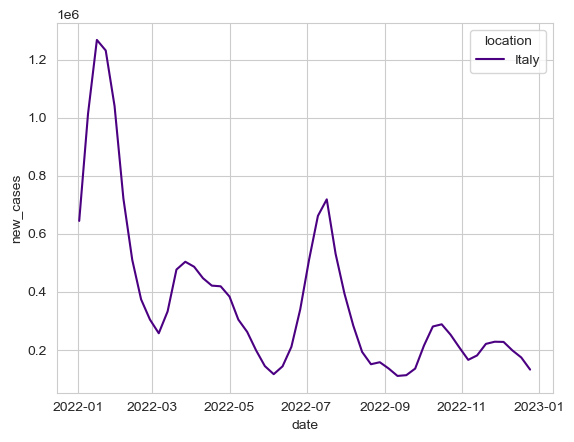

In [275]:
# Crea il grafico con una linea viola scura
sns.lineplot(data = df_italia_2022, x ='date', y = 'new_cases', hue ='location', color = "#4B0082")  

<Axes: xlabel='date', ylabel='total_cases'>

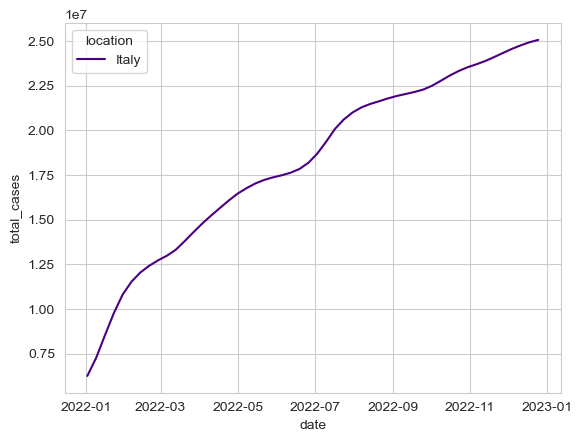

In [279]:
sns.lineplot(data = df_italia_2022, x = 'date', y = 'total_cases', hue = 'location', color = "#800080")

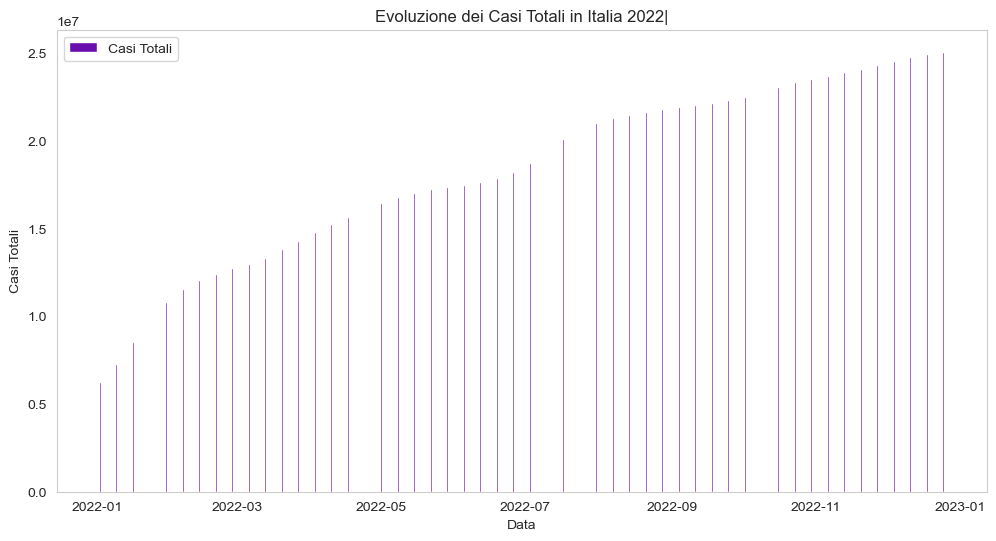

In [295]:
# dati relativi all'Italia nel 2022
df_italia_2022 = italy_data.dropna(subset=["new_cases"])

italy_data["date"] = pd.to_datetime(italy_data["date"])

#Grafico dell'evoluzione dei casi totali in Italia nel 2022
plt.figure(figsize=(12, 6))
plt.bar(italy_data["date"], italy_data["total_cases"], label="Casi Totali", color= "#6A0DAD")
plt.xlabel("Data")
plt.ylabel("Casi Totali")
plt.title("Evoluzione dei Casi Totali in Italia 2022|")
plt.legend()
plt.grid()
plt.show()

In [106]:
icu_data = df_nonzerovalues_newcases[(df_nonzerovalues_newcases['location'].isin(['Italy', 'Germany', 'France'])) &
(df_nonzerovalues_newcases['date'] >= '2022-05-01') & (df_nonzerovalues_newcases['date'] <= '2023-04-30')]
icu_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131214,FRA,Europe,France,2022-05-01,27742592.0,376510.0,53787.143,146744.0,867.0,123.857,431607.16,5857.578,836.797,2282.979,13.488,1.927,0.72,1557.0,22.960,23327.0,343.990,928.0,13.685,8842.0,130.388,...,77.94,55.35,586.0,1418.0,0.002,18.82,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,89536.720,6.19,6.24,1385.4463
131221,FRA,Europe,France,2022-05-08,28007520.0,264928.0,37846.857,147493.0,749.0,107.000,435728.80,4121.634,588.805,2294.632,11.653,1.665,0.75,1403.0,20.689,20939.0,308.776,738.0,10.883,7369.0,108.666,...,77.97,55.70,555.0,1693.0,0.002,18.82,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,90322.420,6.20,6.97,1397.6039
131228,FRA,Europe,France,2022-05-15,28224235.0,216715.0,30959.286,148107.0,614.0,87.714,439100.38,3371.558,481.651,2304.184,9.552,1.365,0.80,1214.0,17.902,18935.0,279.224,573.0,8.450,5307.0,78.259,...,77.99,56.05,562.0,1461.0,0.002,18.81,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,90725.920,6.18,3.63,1403.8474
131235,FRA,Europe,France,2022-05-22,28386474.0,162239.0,23177.000,148573.0,466.0,66.571,441624.40,2524.044,360.578,2311.434,7.250,1.036,0.82,1081.0,15.941,16941.0,249.819,438.0,6.459,4006.0,59.074,...,78.01,56.39,544.0,1334.0,0.002,18.81,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,90998.420,6.15,2.47,1408.0640
131242,FRA,Europe,France,2022-05-29,28499829.0,113355.0,16193.571,148873.0,300.0,42.857,443387.94,1763.528,251.933,2316.101,4.667,0.667,0.89,1014.0,14.953,15646.0,230.723,341.0,5.029,2803.0,41.334,...,78.03,56.63,376.0,995.0,0.001,18.81,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,90363.125,6.07,-5.76,1398.2338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186458,ITA,Europe,Italy,2023-04-02,25701147.0,20999.0,2999.857,189155.0,181.0,25.857,431089.10,352.219,50.317,3172.724,3.036,0.434,NaN,88.0,1.491,2582.0,43.735,71.0,1.203,1344.0,22.765,...,81.21,80.82,14.0,31.0,0.000,NaN,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472,240299.300,11.35,-2.91,4081.8103
186465,ITA,Europe,Italy,2023-04-09,25721054.0,19907.0,2843.857,189303.0,148.0,21.143,431423.00,333.903,47.700,3175.207,2.482,0.355,NaN,84.0,1.423,2509.0,42.498,54.0,0.915,1441.0,24.408,...,81.21,80.83,8.0,16.0,0.000,NaN,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,59037472,240183.300,11.27,-0.94,4079.8400
186472,ITA,Europe,Italy,2023-04-16,25745800.0,24746.0,3535.143,189440.0,137.0,19.571,431838.06,415.068,59.295,3177.505,2.298,0.328,NaN,90.0,1.524,2853.0,48.325,59.0,0.999,1706.0,28.897,...,81.21,80.84,7.0,19.0,0.000,NaN,

In [297]:
# Qui ho definito una variabile di colori viola più scuri
dark_purple_palette = ["#4B0082", "#6A0DAD", "#800080"]

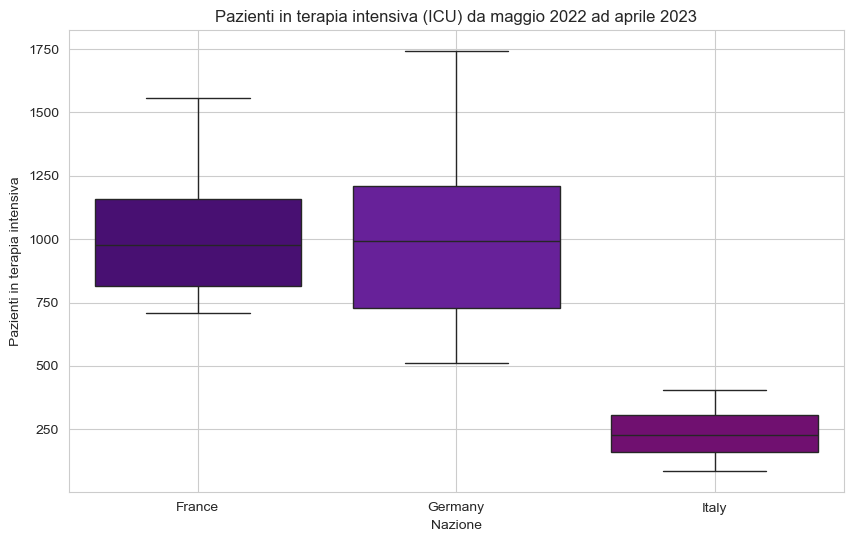

Commento: Il boxplot mostra la distribuzione dei pazienti in terapia intensiva per Italia, Germania e Francia. Possiamo osservare che la mediana dei pazienti in terapia intensiva varia tra le nazioni, con alcune nazioni che hanno una maggiore variabilità rispetto ad altre.


In [301]:
# Creare un boxplot per mostrare la differenza nel numero di pazienti in terapia intensiva
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=icu_data, palette=dark_purple_palette, hue = "location")
plt.title('Pazienti in terapia intensiva (ICU) da maggio 2022 ad aprile 2023')
plt.xlabel('Nazione')
plt.ylabel('Pazienti in terapia intensiva')
plt.grid(True)
plt.show()

print("Commento: Il boxplot mostra la distribuzione dei pazienti in terapia intensiva per Italia, Germania e Francia. \
Possiamo osservare che l'Italia ha un valore più basso di ICU avendo provveduto per prima alla chiusura del paese - lockdown")

In [314]:
df_nonzerovalues_newcases


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
56,AFG,Asia,Afghanistan,2020-03-01,1.0,1.0,0.143,0.0,0.0,0.000,0.025,0.025,0.004,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27.78,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
70,AFG,Asia,Afghanistan,2020-03-15,7.0,6.0,0.857,0.0,0.0,0.000,0.173,0.148,0.021,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,38.89,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
77,AFG,Asia,Afghanistan,2020-03-22,24.0,17.0,2.429,0.0,0.0,0.000,0.591,0.419,0.060,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,41.67,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
84,AFG,Asia,Afghanistan,2020-03-29,91.0,67.0,9.571,2.0,2.0,0.286,2.243,1.651,0.236,0.049,0.049,0.007,1.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,67.59,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
91,AFG,Asia,Afghanistan,2020-04-05,274.0,183.0,26.143,5.0,3.0,0.429,6.752,4.510,0.644,0.123,0.074,0.011,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,78.70,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429385,ZWE,Africa,Zimbabwe,2024-06-16,266374.0,9.0,1.286,5740.0,0.0,0.000,16576.824,0.560,0.080,357.208,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429392,ZWE,Africa,Zimbabwe,2024-06-23,266378.0,4.0,0.571,5740.0,0.0,0.000,16577.072,0.249,0.036,357.208,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429399,ZWE,Africa,Zimbabwe,2024-06-30,266384.0,6.0,0.857,5740.0,0.0,0.000,16577.447,0.373,0.053,357.208,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429406,ZWE,Africa,Zimbabwe,2024-07-07,266385.0,1.0,0.143,5740.0,0.0,0.000,16577.510,0.062,0.009,357.208,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [108]:
# Filtra i dati per Italia, Germania, Francia e Spagna nel 2021
hosp_data_2021 = df_nonzerovalues_newcases.loc[(df_nonzerovalues_newcases['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & 
(df_nonzerovalues_newcases['date'].dt.year == 2021)]
hosp_data_2021

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
130731,FRA,Europe,France,2021-01-03,2427206.0,88948.0,12706.857,66449.0,2915.0,416.429,37761.414,1383.814,197.688,1033.785,45.350,6.479,1.10,2665.0,39.299,24780.0,365.417,1167.0,17.209,7545.0,111.262,...,0.00,NaN,8.0,571.0,0.001,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,47362.797,7.68,11.25,733.94910
130738,FRA,Europe,France,2021-01-10,2549469.0,122263.0,17466.143,69878.0,3429.0,489.857,39663.527,1902.114,271.731,1087.132,53.347,7.621,1.13,2620.0,38.636,24526.0,361.671,1412.0,20.822,9006.0,132.806,...,0.00,NaN,224.0,15189.0,0.022,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,48203.598,7.64,6.08,746.97840
130745,FRA,Europe,France,2021-01-17,2668311.0,118842.0,16977.429,73332.0,3454.0,493.429,41512.420,1848.892,264.127,1140.867,53.736,7.677,1.10,2766.0,40.789,25235.0,372.126,1453.0,21.427,9759.0,143.910,...,0.00,0.00,740.0,50090.0,0.074,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,48886.400,7.58,4.89,757.55930
130752,FRA,Europe,France,2021-01-24,2798460.0,130149.0,18592.714,76746.0,3414.0,487.714,43537.223,2024.802,289.257,1193.981,53.114,7.588,1.07,2955.0,43.576,26357.0,388.672,1731.0,25.526,11284.0,166.399,...,0.00,0.00,1439.0,97413.0,0.144,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,50435.200,7.66,11.39,781.56000
130759,FRA,Europe,France,2021-01-31,2931084.0,132624.0,18946.286,79905.0,3159.0,451.286,45600.527,2063.306,294.758,1243.127,49.146,7.021,1.04,3148.0,46.422,27573.0,406.603,1843.0,27.178,11253.0,165.942,...,0.08,0.00,1243.0,76698.0,0.113,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,51758.200,7.70,9.83,802.06165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363279,ESP,Europe,Spain,2021-11-28,5171584.0,59198.0,8456.857,89540.0,194.0,27.714,108127.920,1237.717,176.817,1872.110,4.056,0.579,1.53,667.0,14.025,3080.0,64.762,394.0,8.285,2920.0,61.398,...,79.03,9.78,3410.0,8898.0,0.019,39.74,93.105,45.5,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,47558632,92760.020,11.50,10.18,1953.38000
363286,ESP,Europe,Spain,2021-12-05,5261477.0,89893.0,12841.857,89835.0,295.0,42.143,110007.414,1879.491,268.499,1878.278,6.168,0.881,1.56,781.0,16.422,3308.0,69.556,577.0,12.132,3427.0,72.058,...,NaN,NaN,3972.0,19715.0,0.041,42.52,93.105,45.5,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,47558632,93941.230,11.53,14.40,1978.25430
363293,ESP,Europe,Spain,2021-12-12,5377493.0,116016.0,16573.714,90190.0,355.0,50.714,112433.086,2425.672,346.525,1885.700,7.422,1.060,1.69,1154.0,24.265,5120.0,107.657,562.0,11.817,4200.0,88.312,..

In [318]:
# Calcola la somma dei pazienti ospitalizzati per ognuna delle nazioni
hosp_sum = hosp_data_2021.groupby('location')['hosp_patients'].sum()
print("Somma dei pazienti ospitalizzati nel 2021:")
print(hosp_sum)

Somma dei pazienti ospitalizzati nel 2021:
location
France     854767.0
Germany         0.0
Italy      626339.0
Spain      357643.0
Name: hosp_patients, dtype: float64


In [110]:
hosp_data_2021

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
130731,FRA,Europe,France,2021-01-03,2427206.0,88948.0,12706.857,66449.0,2915.0,416.429,37761.414,1383.814,197.688,1033.785,45.350,6.479,1.10,2665.0,39.299,24780.0,365.417,1167.0,17.209,7545.0,111.262,...,0.00,NaN,8.0,571.0,0.001,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,47362.797,7.68,11.25,733.94910
130738,FRA,Europe,France,2021-01-10,2549469.0,122263.0,17466.143,69878.0,3429.0,489.857,39663.527,1902.114,271.731,1087.132,53.347,7.621,1.13,2620.0,38.636,24526.0,361.671,1412.0,20.822,9006.0,132.806,...,0.00,NaN,224.0,15189.0,0.022,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,48203.598,7.64,6.08,746.97840
130745,FRA,Europe,France,2021-01-17,2668311.0,118842.0,16977.429,73332.0,3454.0,493.429,41512.420,1848.892,264.127,1140.867,53.736,7.677,1.10,2766.0,40.789,25235.0,372.126,1453.0,21.427,9759.0,143.910,...,0.00,0.00,740.0,50090.0,0.074,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,48886.400,7.58,4.89,757.55930
130752,FRA,Europe,France,2021-01-24,2798460.0,130149.0,18592.714,76746.0,3414.0,487.714,43537.223,2024.802,289.257,1193.981,53.114,7.588,1.07,2955.0,43.576,26357.0,388.672,1731.0,25.526,11284.0,166.399,...,0.00,0.00,1439.0,97413.0,0.144,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,50435.200,7.66,11.39,781.56000
130759,FRA,Europe,France,2021-01-31,2931084.0,132624.0,18946.286,79905.0,3159.0,451.286,45600.527,2063.306,294.758,1243.127,49.146,7.021,1.04,3148.0,46.422,27573.0,406.603,1843.0,27.178,11253.0,165.942,...,0.08,0.00,1243.0,76698.0,0.113,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,51758.200,7.70,9.83,802.06165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363279,ESP,Europe,Spain,2021-11-28,5171584.0,59198.0,8456.857,89540.0,194.0,27.714,108127.920,1237.717,176.817,1872.110,4.056,0.579,1.53,667.0,14.025,3080.0,64.762,394.0,8.285,2920.0,61.398,...,79.03,9.78,3410.0,8898.0,0.019,39.74,93.105,45.5,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,47558632,92760.020,11.50,10.18,1953.38000
363286,ESP,Europe,Spain,2021-12-05,5261477.0,89893.0,12841.857,89835.0,295.0,42.143,110007.414,1879.491,268.499,1878.278,6.168,0.881,1.56,781.0,16.422,3308.0,69.556,577.0,12.132,3427.0,72.058,...,NaN,NaN,3972.0,19715.0,0.041,42.52,93.105,45.5,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,47558632,93941.230,11.53,14.40,1978.25430
363293,ESP,Europe,Spain,2021-12-12,5377493.0,116016.0,16573.714,90190.0,355.0,50.714,112433.086,2425.672,346.525,1885.700,7.422,1.060,1.69,1154.0,24.265,5120.0,107.657,562.0,11.817,4200.0,88.312,..

In [311]:
# Verifico la presenza di null e stampo un commento in merito
null_values = hosp_data_2021['hosp_patients'].isnull().sum()
if null_values > 0:
    print(f"\nCi sono {null_values} valori nulli nella colonna 'hosp_patients'.")
    print("Possiamo considerare la sostituzione con l'interpolazione, con la media o la mediana dei valori disponibili. Io ho deciso di non rimuoverli in questo caso, in quanto i valori null appartengono interamente alla Germania, la quale non ha valori di pazienti ospedalizzati. Mantenendo la presenza dei null si nota subito l'assenza di valori per la Germania")
else:
    print("\n Non ci sono valori nulli nella colonna 'hosp_patients'.")


Ci sono 52 valori nulli nella colonna 'hosp_patients'.
Possiamo considerare la sostituzione con l'interpolazione, con la media o la mediana dei valori disponibili. Io ho deciso di non rimuoverli in questo caso, in quanto i valori null appartengono interamente alla Germania, la quale non ha valori di pazienti ospedalizzati. Mantenendo la presenza dei null si nota subito l'assenza di valori per la Germania


In [307]:
# Seleziono i dati per Italia, Germania, Francia e Spagna nel 2021 - hosp_data2_2021 
# sulla base del df_covid_new al quale non ho rimosso alcun dato, al contrario di df_nonzerovalues_newcases 
hosp_data2_2021 = df_covid_new.loc[(df_covid_new['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & 
(df_covid_new['date'].dt.year == 2021)]
hosp_data2_2021

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
130729,FRA,Europe,France,2021-01-01,2338258.0,0.0,11984.000,63534.0,0.0,445.571,36377.600,0.000,186.442,988.434,0.00,6.932,1.09,2609.0,38.473,24263.0,357.793,1173.0,17.298,7344.0,108.298,...,0.00,NaN,9.0,641.0,0.001,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
130730,FRA,Europe,France,2021-01-02,2338258.0,0.0,11984.000,63534.0,0.0,445.571,36377.600,0.000,186.442,988.434,0.00,6.932,1.09,2632.0,38.813,24458.0,360.668,1173.0,17.298,7477.0,110.259,...,0.00,NaN,9.0,596.0,0.001,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
130731,FRA,Europe,France,2021-01-03,2427206.0,88948.0,12706.857,66449.0,2915.0,416.429,37761.414,1383.814,197.688,1033.785,45.35,6.479,1.10,2665.0,39.299,24780.0,365.417,1167.0,17.209,7545.0,111.262,...,0.00,NaN,8.0,571.0,0.001,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,47362.797,7.68,11.25,733.9491
130732,FRA,Europe,France,2021-01-04,2427206.0,0.0,12706.857,66449.0,0.0,416.429,37761.414,0.000,197.688,1033.785,0.00,6.479,1.12,2657.0,39.181,24962.0,368.101,1184.0,17.460,7590.0,111.925,...,0.00,NaN,11.0,777.0,0.001,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
130733,FRA,Europe,France,2021-01-05,2427206.0,0.0,12706.857,66449.0,0.0,416.429,37761.414,0.000,197.688,1033.785,0.00,6.479,1.14,2616.0,38.577,24871.0,366.759,1178.0,17.371,7710.0,113.695,...,0.00,NaN,27.0,1834.0,0.003,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363308,ESP,Europe,Spain,2021-12-27,6100138.0,0.0,70149.429,91275.0,0.0,83.429,127542.210,0.000,1466.690,1908.386,0.00,1.744,1.87,1722.0,36.208,8024.0,168.718,960.0,20.186,7715.0,162.221,...,79.60,27.4,57.0,66638.0,0.140,43.44,93.105,45.5,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN
363309,ESP,Europe,Spain,2021-12-28,6100138.0,0.0,70149.429,91275.0,0.0,83.429,127542.210,0.000,1466.690,1908.386,0.00,1.744,1.85,1764.0,37.091,8580.0,180.409,1006.0,21.153,8278.0,174.059,...,79.62,28.2,57.0,49841.0,0.105,43.44,93.105,45.5,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN
363310,ESP,Europe,Spain,2021-12-29,6100138.0,0.0,70149.429,91275.0,0.0,83.429,127542.210,0.000,1466.690,1908.386,0.00,1.744,1.82,1794.0,37.722,8916.0,187.474,1007.0,21.174,8804.0,185.119,...,79.63,28.9,57.0,37080.0,0.078,43.44,93.105,45.5,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN
363311,ESP,Europe,Spain,2021-12-30,610

In [324]:
# Calcola la somma dei pazienti ospitalizzati per ognuna delle nazioni per il 2021 - con il data2 (quello senza rimozione degli zeri e null da new_cases
hosp_sum2 = hosp_data2_2021.groupby('location')['hosp_patients'].sum()
print("Somma dei pazienti ospitalizzati nel 2021:")
print(hosp_sum)
# Ritengo che l'output sia errato, invece quello che ritengo essere corretto è l'output con l'utilizzo del hosp_data_2021 (tre celle sopra)

Somma dei pazienti ospitalizzati nel 2021:
location
France     6008717.0
Germany          0.0
Italy      4419950.0
Spain      2411706.0
Name: hosp_patients, dtype: float64


In [337]:
# Qui ordino per location e date in ordine cronologico
df_covidtemp_nonzero = df_covidtemp_nonzero.sort_values(by=["location", "date"])

# Qui trovo il primo valore per ogni location
covidtempfirstcasesforlocation = df_covidtemp_nonzero.groupby("location").first()

# Qui visualizzo le colonne rilevanti
print(covidtempfirstcasesforlocation[["date", "new_cases"]])
covidtempfirstcasesforlocation.sample(5)

                        date  new_cases
location                               
Afghanistan       2020-03-01        1.0
Albania           2020-03-15       33.0
Algeria           2020-03-01        1.0
American Samoa    2021-09-19        1.0
Andorra           2020-03-08        1.0
...                      ...        ...
Vietnam           2020-01-26        2.0
Wallis and Futuna 2020-10-25        1.0
Yemen             2020-04-12        1.0
Zambia            2020-03-22        2.0
Zimbabwe          2020-03-22        2.0

[232 rows x 2 columns]


,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cook Islands,COK,Oceania,2022-02-20,4.0,4.0,0.571,0.0,0.0,0.0,271.242,271.242,38.749,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11390.0,185.0,1.086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.25,NaN,17032,NaN,NaN,NaN,NaN
Mayotte,MYT,Africa,2020-03-15,5.0,5.0,0.714,0.0,0.0,0.0,16.379,16.379,2.340,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.1,NaN,2.411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.46,NaN,326113,19.2000,11.05,25.00,62.829080
Cuba,CUB,North America,2020-03-15,4.0,4.0,0.571,0.0,0.0,0.0,0.362,0.362,0.052,0.0,0.0,0.0,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,518.0,...,1.41,12.57,12558.0,96477.0,0.860,13.89,110.408,43.1,14.738,9.719,NaN,NaN,190.968,8.27,17.1,53.3,85.198,5.2,78.80,0.783,11212198,817.2999,1.77,-5.13,72.322975
Barbados,BRB,North America,2020-03-22,5.0,5.0,0.714,0.0,0.0,0.0,17.710,17.710,2.530,0.0,0.0,0.0,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,585575.0,...,6.40,NaN,7133.0,2009.0,0.713,47.22,664.463,39.8,14.952,9.473,16978.068,NaN,170.050,13.57,1.9,14.5,88.469,5.8,79.19,0.814,281646,-66.2000,-5.44,-4.15,-235.835600
Trinidad and Tobago,TTO,North America,2020-03-15,1.0,1.0,0.143,0.0,0.0,0.0,0.668,0.668,0.095,0.0,0.0,0.0,0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70708.0,...,0.06,0.23,41.0,63.0,0.004,37.96,266.886,36.2,10.014,5.819,28763.071,NaN,228.467,10.97,NaN,NaN,89.443,3.0,73.51,0.796,1531043,NaN,NaN,NaN,NaN


In [116]:
df_nonzerovalues_newcases.to_csv("df_nonzerovalues_newcases.csv")

In [117]:
df_albania = df_nonzerovalues_newcases[df_nonzerovalues_newcases["location"] == "Albania"]
df_albania.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
4048,ALB,Europe,Albania,2021-12-05,201045.0,2313.0,330.429,3108.0,31.0,4.429,71100.555,818.004,116.858,1099.160,10.963,1.566,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.32,2.89,2260.0,1743.0,0.061,51.85,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
4510,ALB,Europe,Albania,2023-03-12,333651.0,80.0,11.429,3600.0,1.0,0.143,117997.320,28.292,4.042,1273.158,0.354,0.051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,103.0,31.0,0.001,NaN,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
3936,ALB,Europe,Albania,2021-08-15,135140.0,1549.0,221.286,2461.0,3.0,0.429,47792.930,547.812,78.259,870.345,1.061,0.152,1.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.06,NaN,3078.0,6356.0,0.224,37.96,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
4468,ALB,Europe,Albania,2023-01-29,333219.0,50.0,7.143,3596.0,0.0,0.000,117844.550,17.683,2.526,1271.743,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,180.0,56.0,0.002,NaN,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
4111,ALB,Europe,Albania,2022-02-06,263172.0,7431.0,1061.571,3371.0,37.0,5.286,93072.080,2628.010,375.430,1192.171,13.085,1.869,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.06,7.46,5563.0,6473.0,0.228,46.30,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
3873,ALB,Europe,Albania,2021-06-13,132437.0,65.0,9.286,2453.0,2.0,0.286,46837.000,22.988,3.284,867.516,0.707,0.101,0.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.69,NaN,1900.0,1676.0,0.059,37.96,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
4524,ALB,Europe,Albania,2023-03-26,333799.0,83.0,11.857,3601.0,0.0,0.000,118049.664,29.353,4.193,1273.512,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,90.0,34.0,0.001,NaN,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
3971,ALB,Europe,Albania,2021-09-19,161324.0,6031.0,861.571,2569.0,34.0,4.857,57053.027,2132.893,304.699,908.540,12.024,1.718,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.74,NaN,2429.0,3054.0,0.107,41.67,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
4433,ALB,Europe,Albania,2022-12-25,332670.0,132.0,18.857,3596.0,2.0,0.286,117650.390,46.682,6.669,1271.743,0.707,0.101,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,213.0,65.0,0.002,11.11,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
4209,ALB,Europe,Albania,2022-05-15,275485.0,219.0,31.286,3497.0,1.0,0.143,97426.630,77.450,11.064,1236.731,0.354,0.051,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.48,10.66,388.0,198.0,0.007,18.52,104.871,38.0,13.18

## **CONSEGNA**


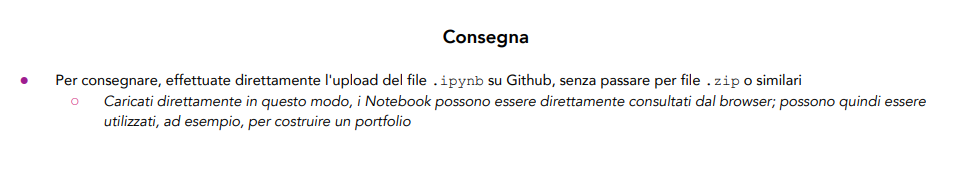

In [119]:
Consegna

## **RINGRAZIAMENTI**

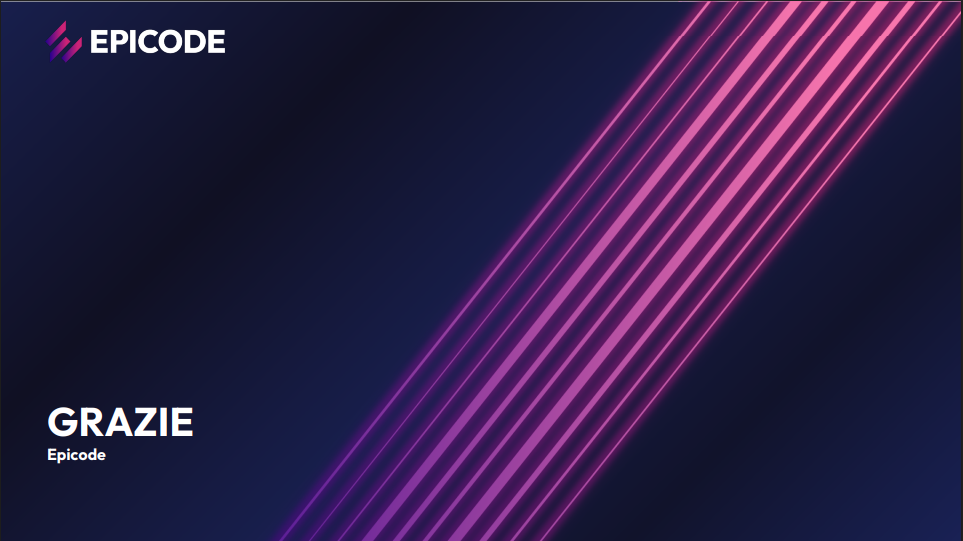

In [333]:
Ringraziamenti 

<span style="color:purple">
Un sentito ringraziamento ai miei colleghi di corso, con cui ho avuto il piacere di confrontarmi, ragionare e scambiare idee.  
Le nostre discussioni mi hanno arricchito e offerto spunti davvero interessanti.  
Ho apprezzato molto questo percorso condiviso.  
Un grazie anche ad Epicode e ai professori per aver reso stimolante questo modulo con Python.  

**Davide Buccino**
</span>
